In [1]:
# Importing required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
# How filterwarnings improve ure code :
import warnings
warnings.warn("Hello I'm a simple warn")

C:\Users\Portable\AppData\Local\Temp\ipykernel_20172\1940971375.py:3: UserWarning: Hello I'm a simple warn
  warnings.warn("Hello I'm a simple warn")


In [3]:
warnings.filterwarnings('ignore')

In [4]:
# Loading Heart Disease data to the variable "data" using pandas library
data = pd.read_csv("heart_2020_cleaned.csv")

In [5]:
# Printing our data shape
data.shape

(319795, 18)

319795: data samples

18: data columns (we have 17 features and 1 target that we aim to predict)

In [6]:
# Printing first 5 rows in our data
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [7]:
# Extract column names
data.columns.to_list()

['HeartDisease',
 'BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [8]:
# Print informations about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

It shows each column with it's Non-null values and it's type

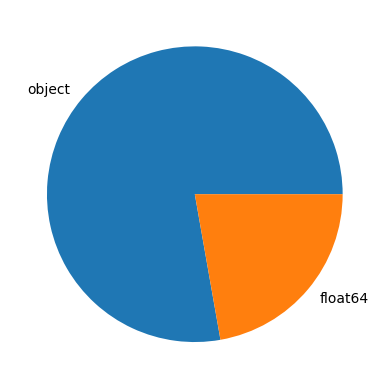

In [9]:
data.dtypes.value_counts().plot.pie()
plt.show()

In [52]:
# We can access to specific column with this line:
data[["HeartDisease"]]

,HeartDisease
0,No
1,No
2,No
3,No
4,No
...,...
319790,Yes
319791,No
319792,No
319793,No


In [12]:
# The value of each class in the column "HeartDisease"
data['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [13]:
# The percentage of each class in the column "HeartDisease"
(data["HeartDisease"].value_counts()/(data.shape[0]))*100

No     91.440454
Yes     8.559546
Name: HeartDisease, dtype: float64

That was for taking a look on column names, and types, and exploring missing values.

Now let's move to descriptive statistics.

**Descriptive Statistics**

In [14]:
#Data description; mean, max, min, std (ecart type)
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [15]:
# average of column a specific column 
data['BMI'].mean()

28.325398520927465

In [16]:
# mode 'most frequent value repeted in the column' (in column "Smoking" for example)
data['Smoking'].mode()[0]


'No'

In [17]:
# median = 50% (sd quartile )
data['BMI'].median()

27.34

It calculates basic statistics for all continuous variables(columns) 

**Correlation**

The correlation formula measures the strength and direction of the linear relationship between two variables.

It's formula is the following:

r = cov(X,Y)/(std(X)*std(Y))

In [18]:
# The correlation table
correlation = data.corr()
correlation

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


* It shows only the correlation between numerical variables.
* All variables, in our case, have low correlation with each other.

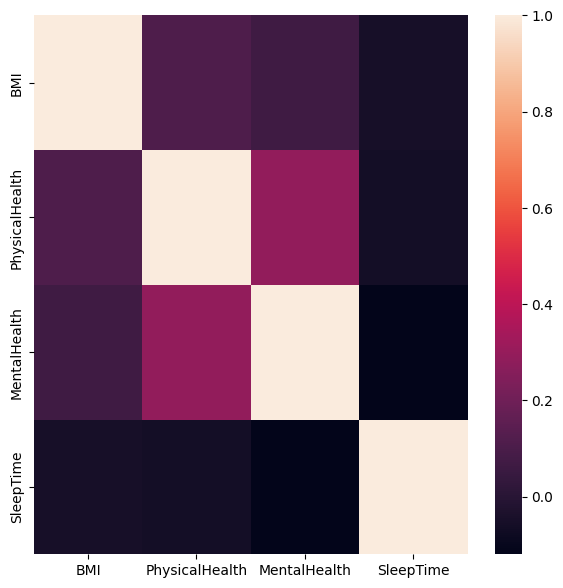

In [53]:
# Heatmap is a graphical representation of data where values in a matrix are represented as colors.

plt.figure(figsize=(7,7)) # This line for the figure size adjustment.
sns.heatmap(correlation, annot=True) # annot=True to show the values of correlation the heatmap
plt.show()

In [56]:
data.dtypes # It returns each column with it's corresponding type

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [21]:
# The functionnality of enumerate 
for i,c in enumerate(data.dtypes): # i: is the index, c: is the value  
    print(i,c) 

0 object
1 float64
2 object
3 object
4 object
5 float64
6 float64
7 object
8 object
9 object
10 object
11 object
12 object
13 object
14 float64
15 object
16 object
17 object


**Slicing**

Lst[ Initial : End : IndexJump ] : slicing in list 

for example data.iloc[1:3, 0:3] : it will return subset of a dataframe (lines:1 and 2 (3 excluded); columns from 0 to 3 )

In [57]:
data.iloc[1:3,0:3]

,HeartDisease,BMI,Smoking
1,No,20.34,No
2,No,26.58,Yes


data.loc is used for slicing too but you can add the name of the column you want to access.

In [58]:
# Access to all the "HeartDisease" column
data.loc[0:,'HeartDisease']

0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object

In [59]:
# visualize all data
data.loc[0:]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [60]:
# visualize element from 1 to 5 for HeartDisease column
data.loc[1:5,'HeartDisease']

1     No
2     No
3     No
4     No
5    Yes
Name: HeartDisease, dtype: object

In [27]:
# First method to split data 
categorical_columns = []
numerical_columns = []

# Loop through the columns and categorize them
for column in data.columns:
    if data[column].dtype == 'object': 
        categorical_columns.append(column) # add the column name in categorical_columns if the column type is 'object'
    else:
        numerical_columns.append(column) 

In [28]:
numerical_data=data[numerical_columns]

In [29]:
numerical_data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


In [31]:
#second method
categorical_data=[]
numerical_data=[]
for i,c in enumerate(data.dtypes):
    if c=='object':
        categorical_data.append(data.iloc[:,i])
    else:
        numerical_data.append(data.iloc[:,i])


categorical_data and numerical_data are both lists

In [33]:
# Making a DataFrame from these lists
categorical_data=pd.DataFrame(categorical_data).transpose()
numerical_data=pd.DataFrame(numerical_data).transpose()

In [34]:
categorical_data.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [35]:
numerical_data.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


**Data Visualization**

A scatter plot is a type of data visualization that displays individual data points on a two-dimensional (between two variables) graph.

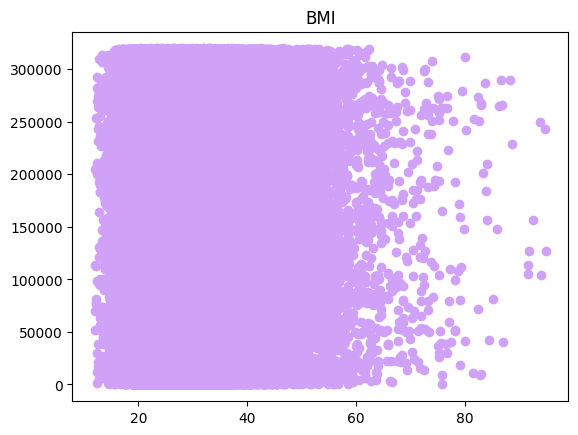

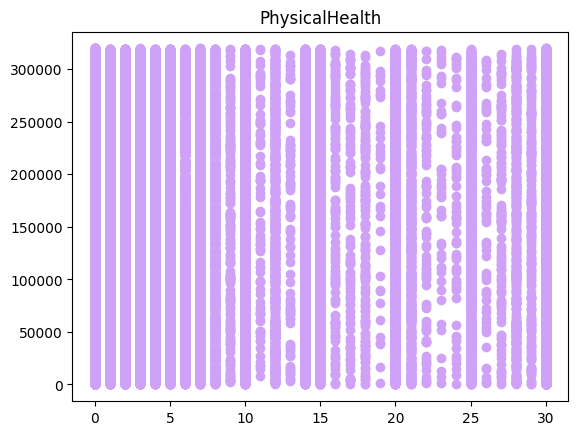

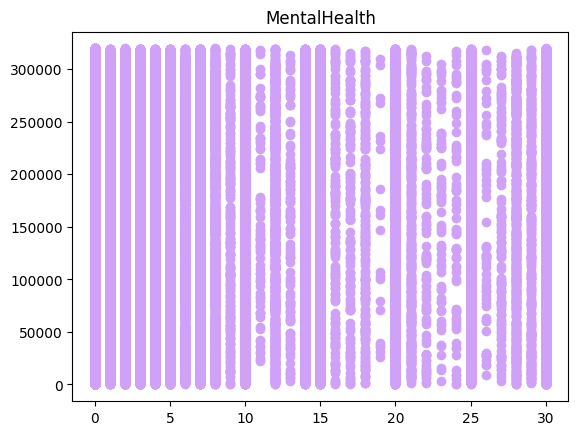

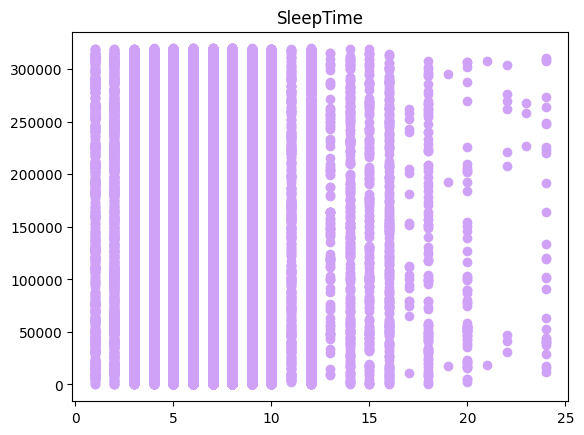

In [63]:
# starting with scatter plot
for column in numerical_data.columns: # looping through all our data columns
    x = numerical_data[column] # the x content 
    y = range(len(data)) # the y content
    plt.scatter(x, y, c="#D0A2F7") # c is the color 
    plt.title(column) 
    plt.show()

For the BMI column, we can see that the data points over the value 80 tend to be outliers

Categorical Data

In [39]:
# Extract class for each column
for col in data.select_dtypes('object'):
    print(col,data[col].unique())

HeartDisease ['No' 'Yes']
Smoking ['Yes' 'No']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
DiffWalking ['No' 'Yes']
Sex ['Female' 'Male']
AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ['Yes' 'No']
GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
Asthma ['Yes' 'No']
KidneyDisease ['No' 'Yes']
SkinCancer ['Yes' 'No']


* A histogram is a graphical representation of the distribution of a dataset. It provides a visual summary of the frequency or probability distribution of a set of continuous or discrete data. In our case, we use it to our categorical data.

* Histgrams can provide some insights into potential data imbalances, especially in the context of classification problems.

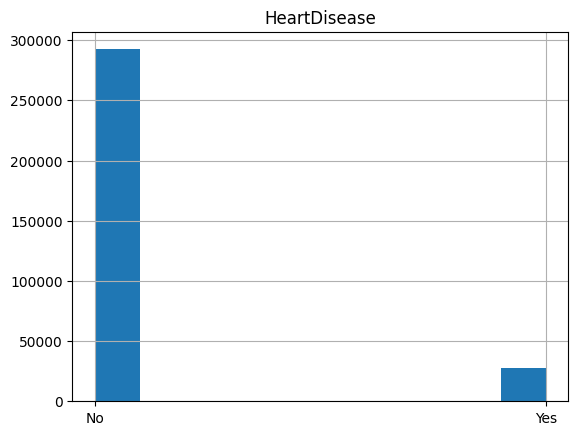

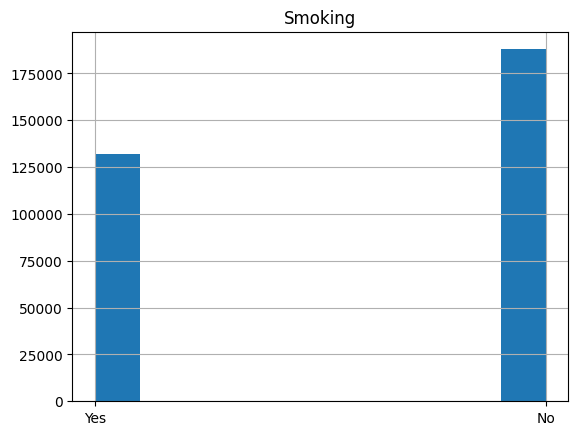

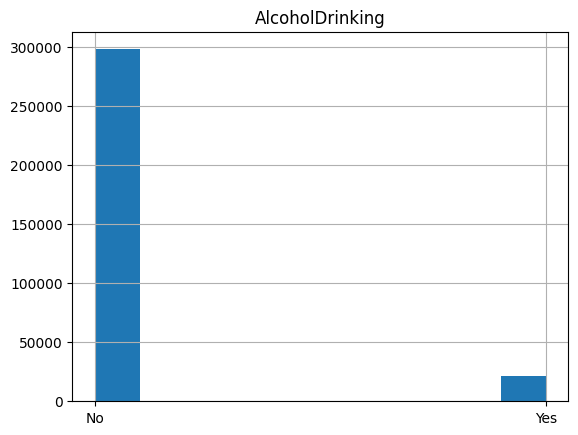

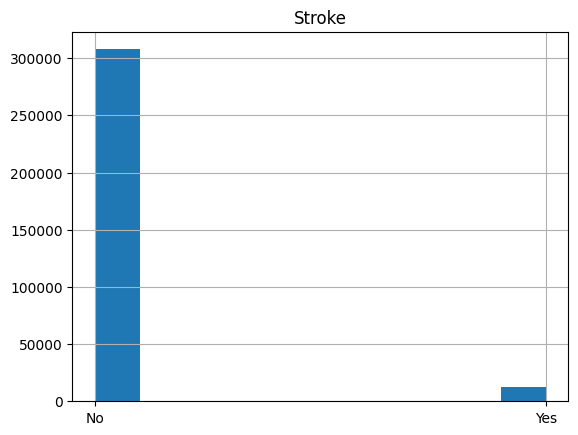

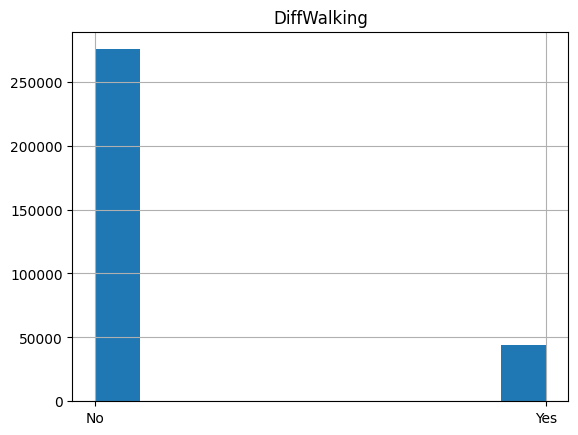

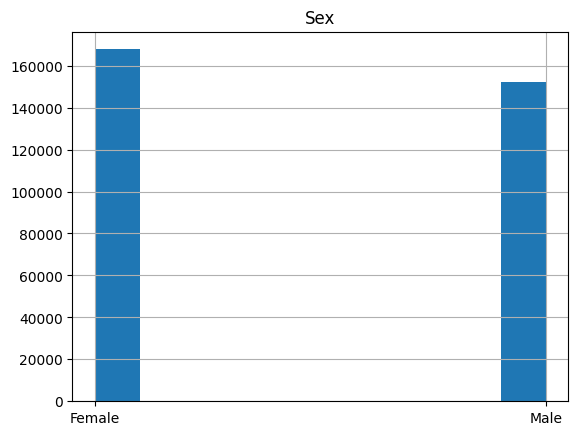

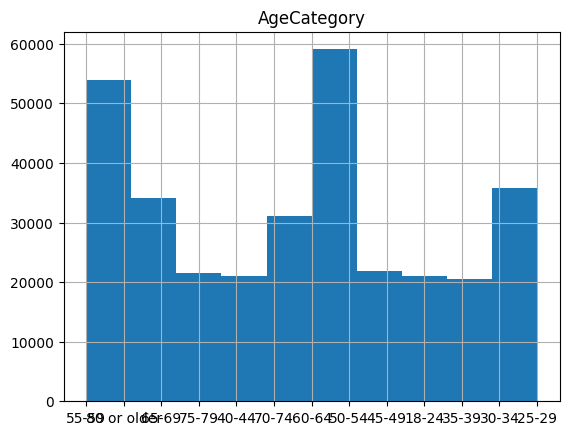

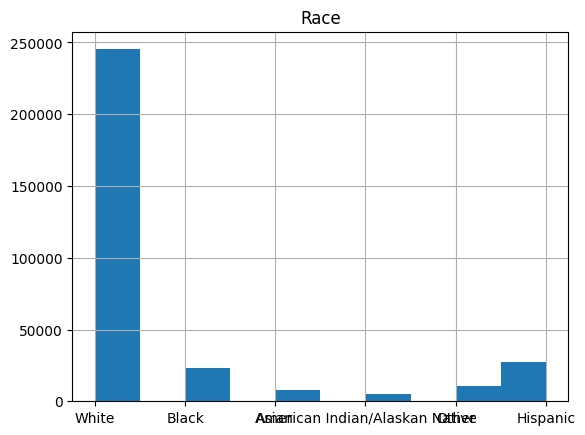

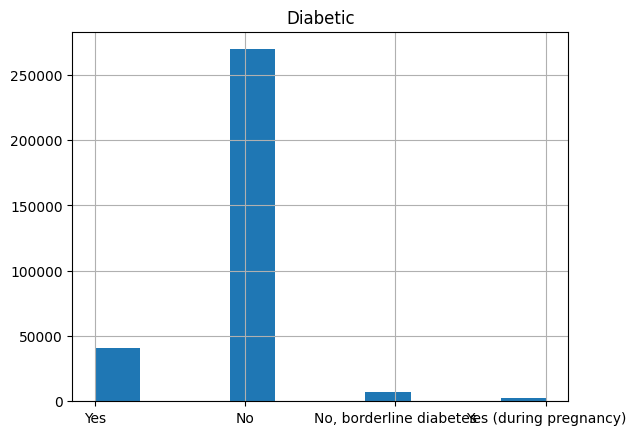

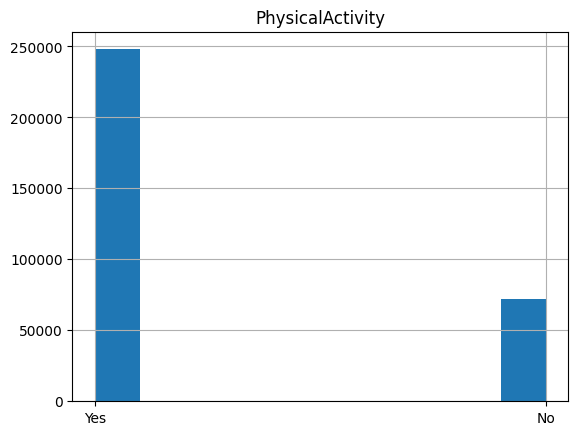

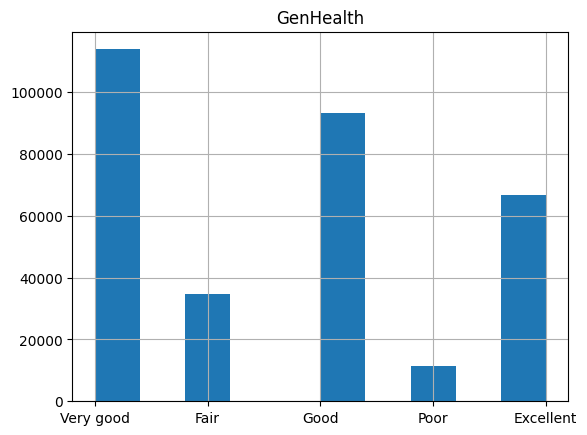

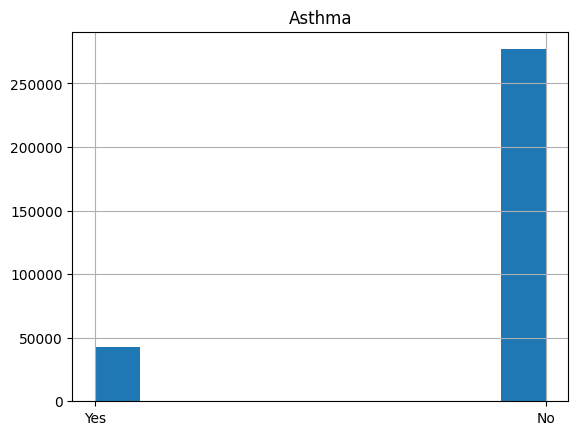

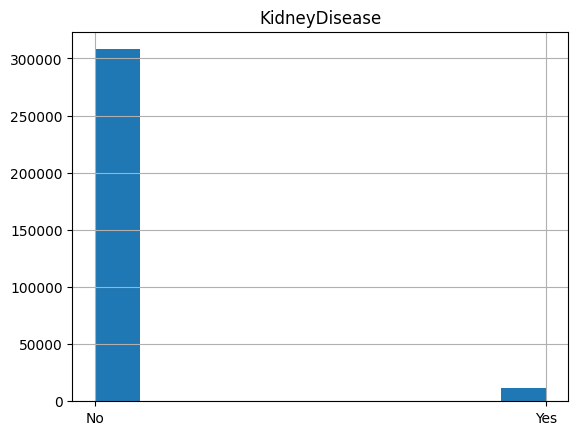

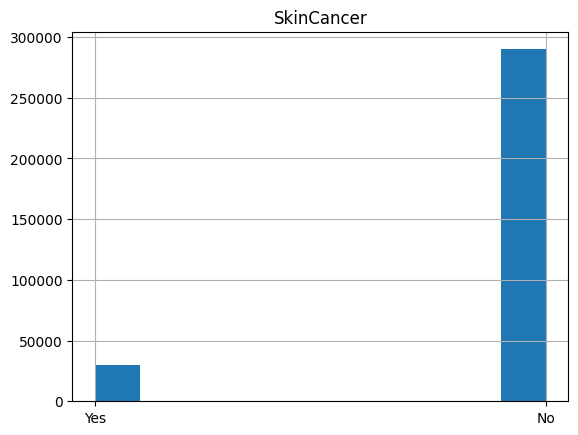

In [41]:
for col in categorical_data:
    categorical_data[col].hist()
    plt.title(col)
    plt.show()

The feature "AlcoholDrinking" have class inbalance, which will affect our model, 

* Kdeplot is a way to visualize the distribution.

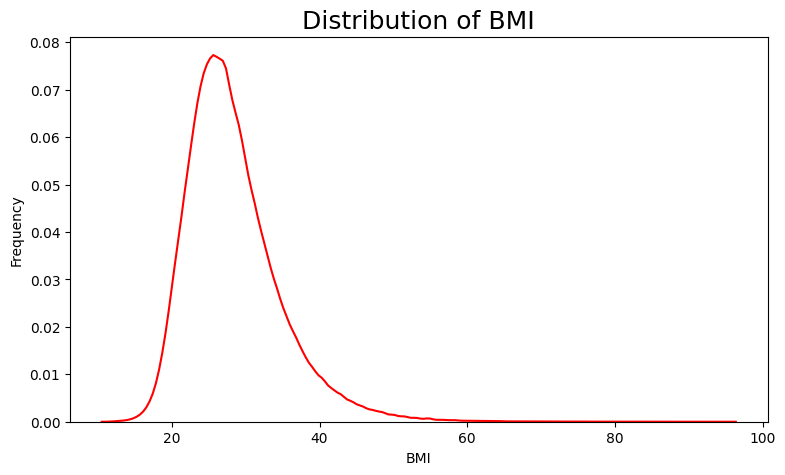

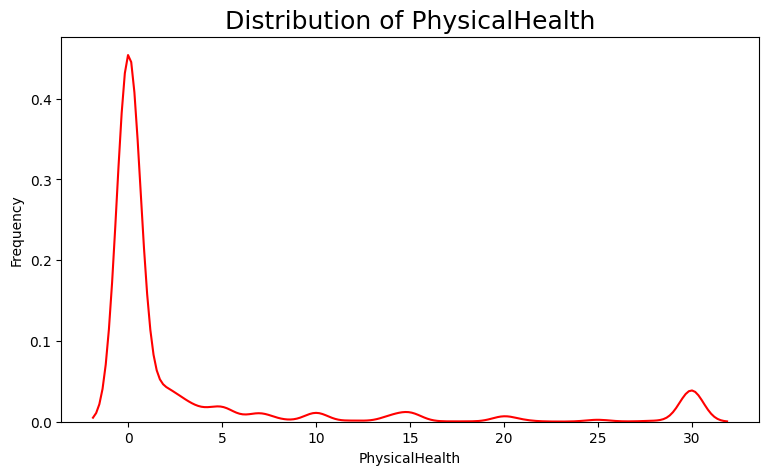

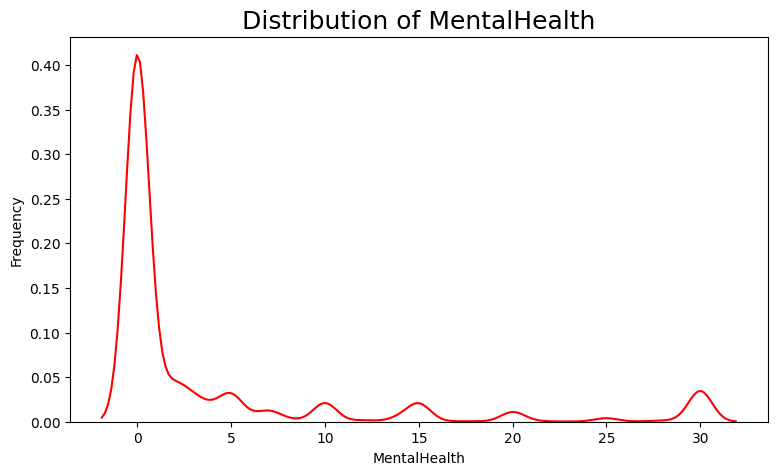

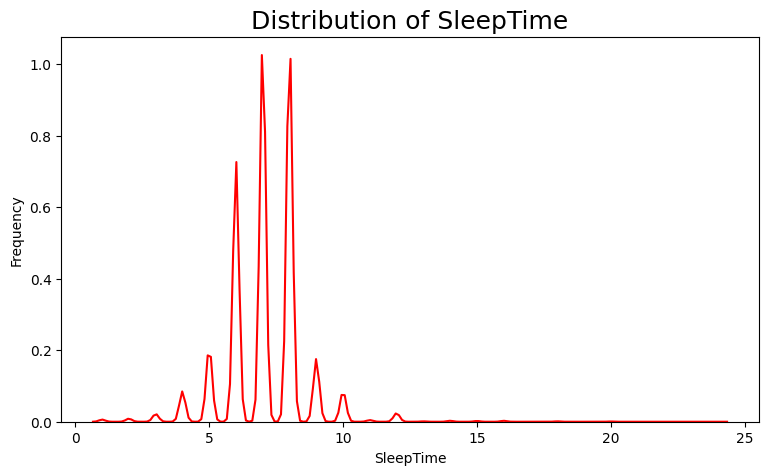

In [65]:
for col in numerical_data: 
    plt.figure(figsize = (9,5)) 
    sns.kdeplot(numerical_data[col], color="red", label="HeartDisease") 
    plt.title('Distribution of '+col, fontsize = 18)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

* The distribution of the BMI, PhysicalHealth and MentalHealth follow the normal distribution.
* PhysicalHealth and MentalHealth have outliers.

# Boxplots:
* Boxplots provide a simple and effective way to visualize the distribution of data,
particularly in comparing multiple datasets. 
* Boxplots display important summary statistics such as the median, quartiles, and potential outliers.

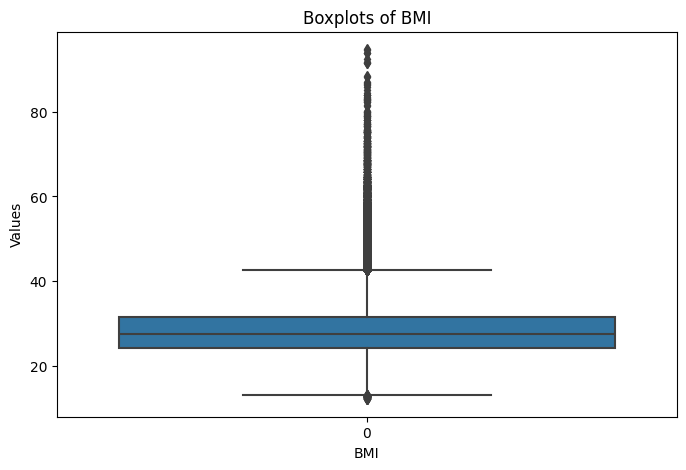

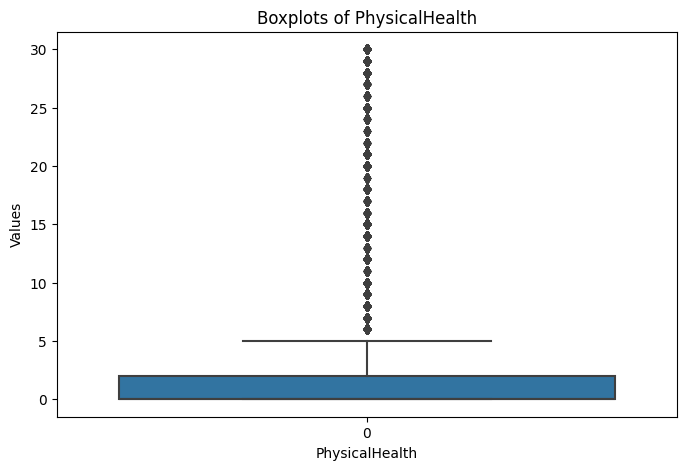

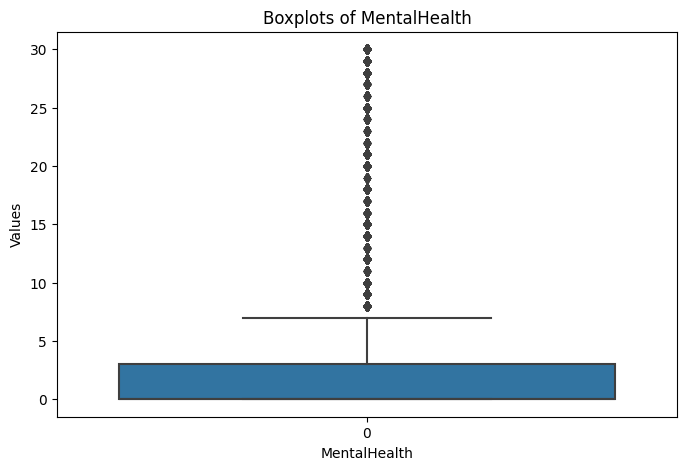

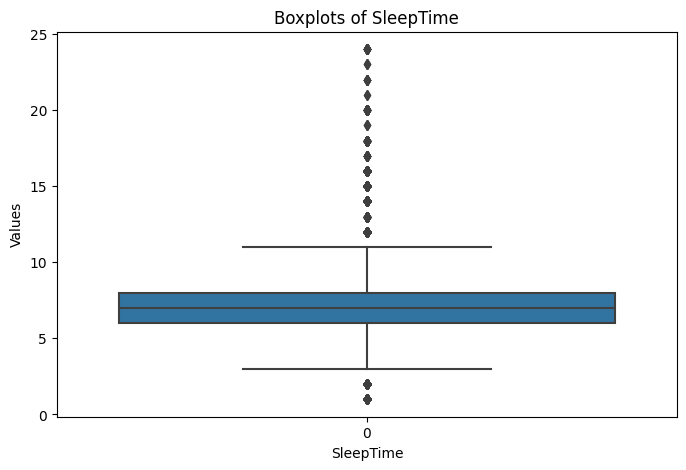

In [44]:
for col in numerical_data:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.boxplot(data=data[col], ax=ax)
    ax.set_title('Boxplots of '+col)
    ax.set_xlabel(col)
    ax.set_ylabel('Values')
    plt.show()

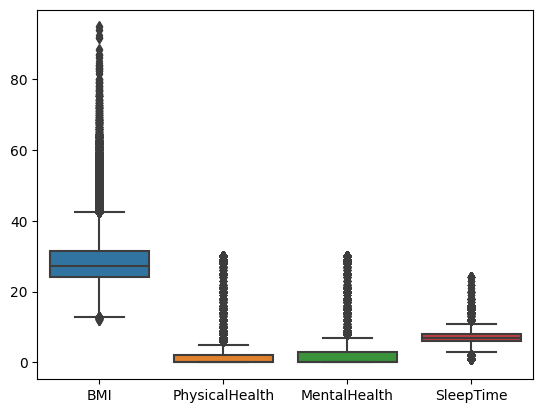

<Figure size 3000x2000 with 0 Axes>

In [45]:
#other method to do boxplot :
sns.boxplot(data=numerical_data)
plt.figure(figsize=(30,20))
plt.show()